In [3]:
import pandas as pd
import matplotlib.pyplot as plt

train_seq = pd.read_csv("../data/train_sequences.csv")
train_seq2 = pd.read_csv("../data/train_sequences.v2.csv")
train_lbl = pd.read_csv("../data/train_labels.csv")

## Data structure
The section below explores the data structure, alongside some basic exploratory data analysis

In [3]:
train_seq.head(5)


,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


As can be seen above, the sequence dataframe contains 5 columns.
The `all_sequences` column contains a FASTA-formatted information on the chain, including: 
* `1SCL_1|Chain A`: PDB ID (1SCL) & chain number (_1)
* `Chain A`: the molecule is from chain A of the PDB structure
* `RNA(...)` or name: the full chemical sequence (5' to 3') or descriptor of the molecule with ribonucleotide names, e.g. GP = Guanosine-Phosphate
* Actual sequence: in format `\nGGGAUAACUUCGGUUGUCCC\n`

In [4]:
train_seq.iloc[1,4]

'>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU\n'

The label dataframe provides coordinates of each nucleotide corresponding to each of the ID:

In [6]:
train_lbl.head(10)

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793
5,1SCL_A_6,C,6,2.040,-14.908000,11.771
6,1SCL_A_7,U,7,1.107,-11.513000,7.517
7,1SCL_A_8,C,8,2.991,-6.406000,4.783
8,1SCL_A_9,A,9,0.896,-1.193000,7.608
9,1SCL_A_10,G,10,0.228,2.646000,9.128


## EDA
This section descriptively examines the dataset and its properties.

Seq length distribution:


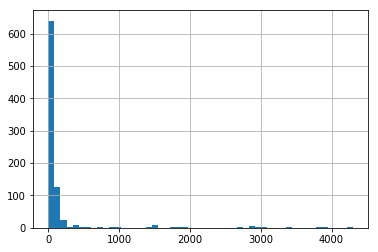

Median seq length: 39.5


In [31]:
train_seq['seq_length'] = train_seq['sequence'].str.len()
print("Seq length distribution:")
plt.plot()
train_seq['seq_length'].hist(bins=50)
plt.show()
print(f"Median seq length: {train_seq['seq_length'].median()}")


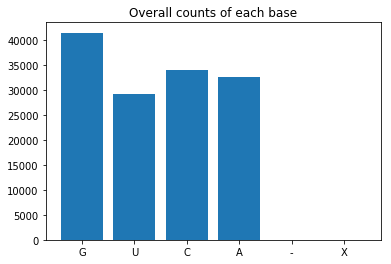

In [67]:
from collections import Counter

seq = train_seq.iloc[0, 1]

nts = []
for seq in train_seq.iloc[:, 1]:
    nts.extend(seq)

nts_counts = Counter(nts)
plt.bar(nts_counts.keys(), nts_counts.values())
plt.title("Overall counts of each base")
#plt.xticks(nts_counts.keys())
plt.show()

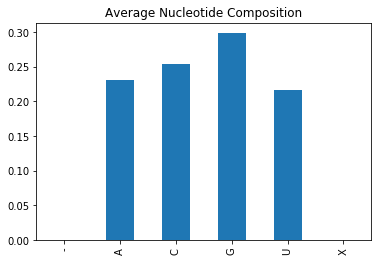

In [76]:
def nucleotide_composition(seq):
    d = dict(Counter(seq))
    d2 = {k: v/len(seq) for k, v in d.items()}
    return d2

comp = train_seq['sequence'].apply(nucleotide_composition).fillna(0)
comp_df = pd.DataFrame(comp.tolist()).fillna(0)
comp_df.mean().plot(kind='bar', title='Average Nucleotide Composition')

## Distance calculation

In [ ]:
# calculate pairwise distance 

def calc_d(a, b, data = train_lbl):
    l1 = data.iloc[a, 3:6]
    l2 = data.iloc[b, 3:6]
    d = sum((l1-l2)**2)**(1/2)
    return d
    


# Pre-processing

## Make toy datasets

In [24]:
from pathlib import Path
import shutil

n = 30 # number of unique sequences 

toy_data_seq = train_seq.iloc[0:n, :]
seq_list = toy_data_seq['target_id']
toy_data_lbl = train_lbl[train_lbl['ID'].str.startswith(tuple(seq_list))]

toy_data_seq.to_csv("../toy_data/train_sequences.csv", index=False)
toy_data_lbl.to_csv("../toy_data/train_labels.csv", index=False)


# Copy corresponding MSA files
for seq in seq_list:
    msa_file = Path(f"../data/MSA/{seq}.MSA.fasta")
    if msa_file.exists():
        shutil.copy(msa_file, Path("../toy_data/MSA"))
        print(f"{seq}.MSA.fasta copied to toy data")
    else: 
        print(f"{seq}.MSA.fasta does not exist")

1SCL_A.MSA.fasta copied to toy data
1RNK_A.MSA.fasta copied to toy data
1RHT_A.MSA.fasta copied to toy data
1HLX_A.MSA.fasta copied to toy data
1HMH_E.MSA.fasta copied to toy data
1RNG_A.MSA.fasta copied to toy data
1MME_D.MSA.fasta copied to toy data
1KAJ_A.MSA.fasta copied to toy data
1SLO_A.MSA.fasta copied to toy data
1BIV_A.MSA.fasta copied to toy data
1ANR_A.MSA.fasta copied to toy data
1ZIG_A.MSA.fasta copied to toy data
1ZIH_A.MSA.fasta copied to toy data
1ETF_A.MSA.fasta copied to toy data
1ZIF_A.MSA.fasta copied to toy data
1KPD_A.MSA.fasta copied to toy data
1IKD_A.MSA.fasta copied to toy data
1ZDI_S.MSA.fasta copied to toy data
1AFX_A.MSA.fasta copied to toy data
1EBQ_A.MSA.fasta copied to toy data
1EBR_A.MSA.fasta copied to toy data
1ULL_A.MSA.fasta copied to toy data
1KIS_B.MSA.fasta copied to toy data
1KIS_A.MSA.fasta copied to toy data
1ATO_A.MSA.fasta copied to toy data
1TLR_A.MSA.fasta copied to toy data
1VOP_A.MSA.fasta copied to toy data
1AQO_A.MSA.fasta copied to t

In [22]:
seq_list

0     1SCL_A
1     1RNK_A
2     1RHT_A
3     1HLX_A
4     1HMH_E
5     1RNG_A
6     1MME_D
7     1KAJ_A
8     1SLO_A
9     1BIV_A
10    1ANR_A
11    1ZIG_A
12    1ZIH_A
13    1ETF_A
14    1ZIF_A
15    1KPD_A
16    1IKD_A
17    1ZDI_S
18    1AFX_A
19    1EBQ_A
20    1EBR_A
21    1ULL_A
22    1KIS_B
23    1KIS_A
24    1ATO_A
25    1TLR_A
26    1VOP_A
27    1AQO_A
28    1ATV_A
29    1ATW_A
Name: target_id, dtype: object

('1SCL_A',
 '1RNK_A',
 '1RHT_A',
 '1HLX_A',
 '1HMH_E',
 '1RNG_A',
 '1MME_D',
 '1KAJ_A',
 '1SLO_A',
 '1BIV_A')